In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

Upload the dataset. CSV file.

In [ ]:
volunteer = pd.read_csv('heart failur classification dataset.csv')
volunteer.head()

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,75.0,0,582,0,20,1,265000.00,1.9,NaN,Male,No,4.0,1
1,1,55.0,0,7861,0,38,0,263358.03,1.1,136.0,Male,No,6.0,1
2,2,65.0,0,146,0,20,0,162000.00,1.3,129.0,Male,Yes,7.0,1
3,3,50.0,1,111,0,20,0,210000.00,1.9,137.0,Male,No,7.0,1
4,4,65.0,1,160,1,20,0,327000.00,2.7,116.0,Female,No,8.0,1


Number of rows and columns in the dataset

In [ ]:
volunteer.shape

(299, 14)

to find existing null values in the dataset

In [ ]:
volunteer.isnull()

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,True,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False,False


to find the total number of null values in each columns 

In [ ]:
volunteer.isnull().sum()

Unnamed: 0                  0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                6
sex                         0
smoking                     0
time                        7
DEATH_EVENT                 0
dtype: int64

handling the null values. Replacing the null values with MEAN values.Median/Mode can also be used.

In [ ]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(volunteer[['serum_sodium']])

volunteer['serum_sodium'] = impute.transform(volunteer[['serum_sodium']])

impute.fit(volunteer[['time']])

volunteer['time'] = impute.transform(volunteer[['time']])


In [ ]:
volunteer.isnull().sum()

Unnamed: 0                  0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Data types of each columns

In [ ]:
volunteer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                299 non-null    int64  
 1   age                       299 non-null    float64
 2   anaemia                   299 non-null    int64  
 3   creatinine_phosphokinase  299 non-null    int64  
 4   diabetes                  299 non-null    int64  
 5   ejection_fraction         299 non-null    int64  
 6   high_blood_pressure       299 non-null    int64  
 7   platelets                 299 non-null    float64
 8   serum_creatinine          299 non-null    float64
 9   serum_sodium              299 non-null    float64
 10  sex                       299 non-null    object 
 11  smoking                   299 non-null    object 
 12  time                      299 non-null    float64
 13  DEATH_EVENT               299 non-null    int64  
dtypes: float64

turing the string(object) type to unique values.

In [ ]:
volunteer['smoking'].unique()   ##finding the unique values of the column.

array(['No', 'Yes'], dtype=object)

In [ ]:
volunteer['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "Accessible" column
volunteer['smoking'] = enc.fit_transform(volunteer['smoking'])

# Compare the two columns
print(volunteer[['smoking']].head())

   smoking
0        0
1        0
2        1
3        0
4        0


In [ ]:
# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "Accessible" column
volunteer['sex'] = enc.fit_transform(volunteer['sex'])

# Compare the two columns
print(volunteer[['sex']].head())

   sex
0    1
1    1
2    1
3    1
4    0


minmaxscaler 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(volunteer)

scaled = scaler.transform(volunteer)


In [ ]:
print("per-feature minimum before scaling:\n {}".format(volunteer.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(volunteer.max(axis=0)))


per-feature minimum before scaling:
 Unnamed: 0                      0.0
age                            40.0
anaemia                         0.0
creatinine_phosphokinase       23.0
diabetes                        0.0
ejection_fraction              14.0
high_blood_pressure             0.0
platelets                   25100.0
serum_creatinine                0.5
serum_sodium                  113.0
sex                             0.0
smoking                         0.0
time                            4.0
DEATH_EVENT                     0.0
dtype: float64
per-feature maximum before scaling:
 Unnamed: 0                     298.0
age                             95.0
anaemia                          1.0
creatinine_phosphokinase      7861.0
diabetes                         1.0
ejection_fraction               80.0
high_blood_pressure              1.0
platelets                   850000.0
serum_creatinine                 9.4
serum_sodium                   148.0
sex                              1.0


In [ ]:
print("per-feature minimum after scaling:\n {}".format(scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(scaled.max(axis=0)))


per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


heat map & correlation map

In [ ]:
corr = volunteer.corr()
corr


,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
Unnamed: 0,1.000000,-0.226271,-0.134721,-0.010046,0.030481,0.050053,-0.193929,0.007991,-0.155842,0.092301,-0.018183,-0.026890,0.982062,-0.543600
age,-0.226271,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.039837,0.065430,0.018668,-0.212568,0.253729
anaemia,-0.134721,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.032351,-0.094769,-0.107290,-0.130979,0.066270
creatinine_phosphokinase,-0.010046,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.054865,0.079791,0.002421,-0.004551,0.062728
diabetes,0.030481,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.102629,-0.157730,-0.147173,0.041414,-0.001943
ejection_fraction,0.050053,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.165652,-0.148386,-0.067315,0.043616,-0.268603
high_blood_pressure,-0.193929,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037187,-0.104615,-0.055711,-0.181262,0.079351
platelets,0.007991,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.044226,-0.125120,0.028234,0.011929,-0.049139
serum_creatinine,-0.155842,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.181037,0.006970,-0.027414,-0.151508,0.294278
serum_sodium,0.092301,-0.039837,0.032351,0.054865,-0.102629,0.165652,0.037187,0.044226,-0.181037,1.000000,-0.030740,-0.005270,0.083455,-0.176602


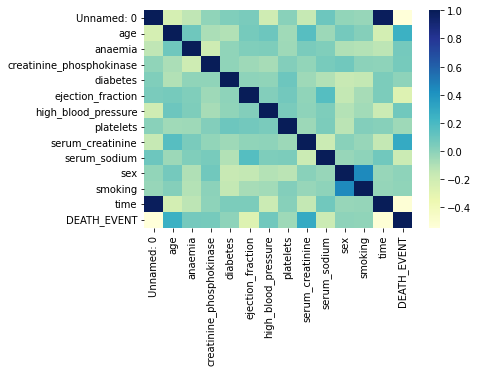

In [ ]:
import seaborn as sns

sns.heatmap(corr, cmap = 'YlGnBu')


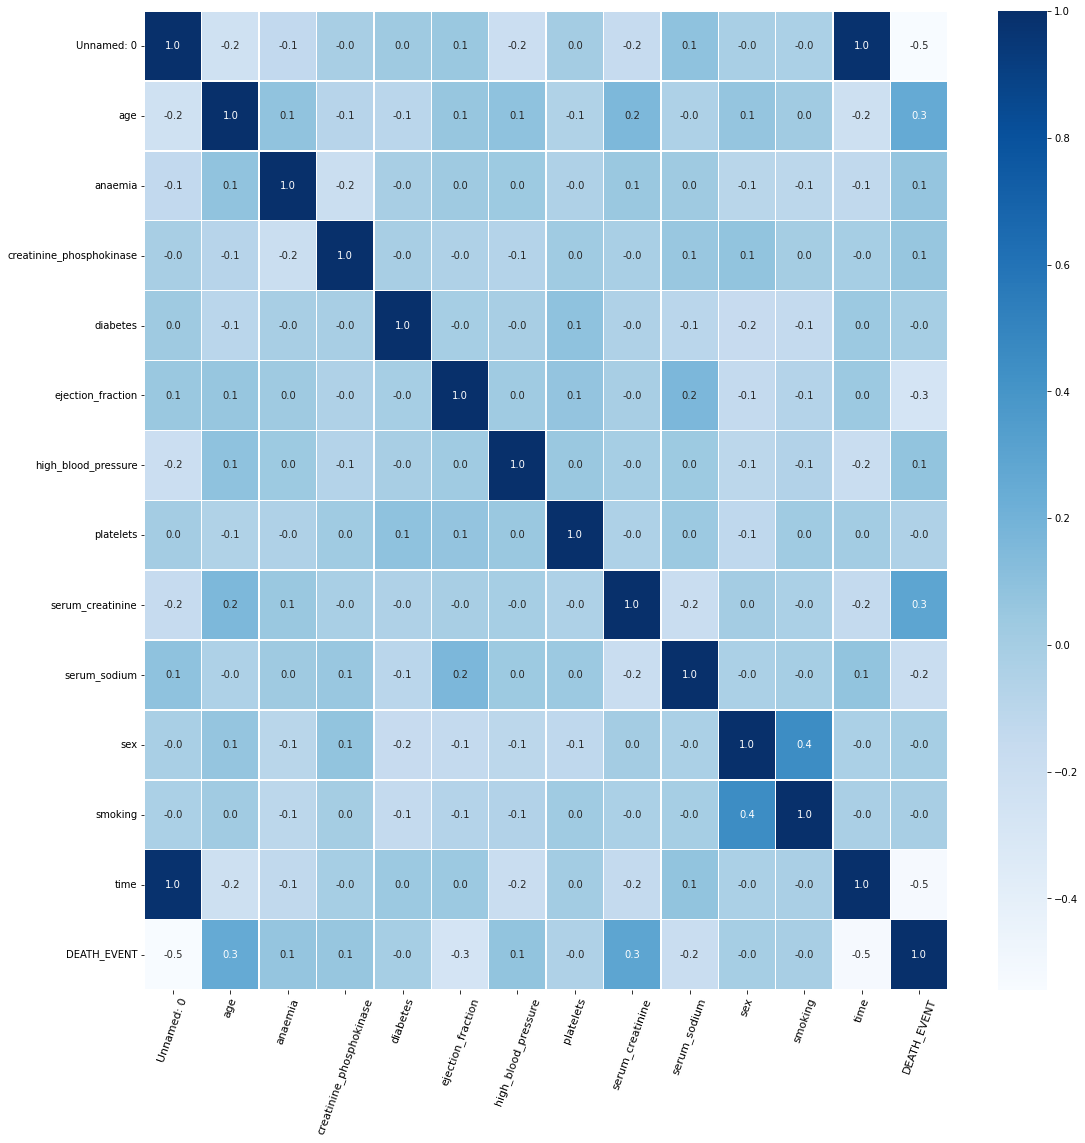

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(volunteer.corr(), cmap='Blues',annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.xticks(fontsize=11,rotation=70)
plt.show()

train_test_split

In [ ]:
feature = volunteer [['age',
 'diabetes',
 'high_blood_pressure',
 'ejection_fraction',
 'anaemia',
 'creatinine_phosphokinase',
 'serum_sodium',
 'serum_creatinine', 'time']]
label = volunteer['DEATH_EVENT']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size = 0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)


(239, 9)
(60, 9)
